 ## 다중공선성


- 공선성(collinearity): 하나의 독립변수가 다른 하나의 독립변수로 잘 예측되는 경우, 또는 서로 상관이 높은 경우<br>

- 다중공선성(multicollinearity): 하나의 독립변수가 다른 여러 개의 독립변수들로 잘 예측되는 경우<br><br>

##### **(다중)공선성이 있으면:**

- 계수 추정이 잘 되지 않거나 불안정해져서 데이터가 약간만 바뀌어도 추정치가 크게 달라질 수 있다<br>
- 계수가 통계적으로 유의미하지 않은 것처럼 나올 수 있다<br><br><br>
---
- 분산팽창계수(VIF, Variance Inflation Factor)를 구하여 판단
- 엄밀한 기준은 없으나 보통 10보다 크면 다중공선성이 있다고 판단(5를 기준으로 하기도 함)<br><br>
---
- 변수 정규화<br>
- 변수 제거<br>
- PCA(주성분 분석)

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/euphoris/f8cc761601d81d8ca077a9fcacf355b5/raw/46f23ba0efdbf315fcf9536b83a7c417590cd259/crab.csv')

In [3]:
df.tail()

,crab,sat,y,weight,width,color,spine
168,169,3,1,2.750,26.1,3,3
169,170,4,1,3.275,29.0,3,3
170,171,0,0,2.625,28.0,1,1
171,172,0,0,2.625,27.0,4,3
172,173,0,0,2.000,24.5,2,2


In [12]:
X = df[['sat', 'weight', 'width']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [32]:
model = sm.OLS(y_train, X_train)
results = model.fit()

In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.827
Model:                            OLS   Adj. R-squared (uncentered):              0.823
Method:                 Least Squares   F-statistic:                              214.8
Date:                Sun, 01 May 2022   Prob (F-statistic):                    3.39e-51
Time:                        12:25:41   Log-Likelihood:                         -42.203
No. Observations:                 138   AIC:                                      90.41
Df Residuals:                     135   BIC:                                      99.19
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sat            0.1028      0.010     10.381      0.000       0.083       0.122
weight         0.0755      0.071      1.063      0.290      -0.065       0.216
width          0.0051      0.006      0.802      0.424      -0.008       0.018
==============================================================================
Omnibus:                       13.620   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                5.772
Skew:                           0.247   Prob(JB):                       0.0558
Kurtosis:                       2.128   Cond. No.                         67.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
model.exog_names

['sat', 'weight', 'width']

In [38]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names))

,컬럼,VIF
0,sat,2.313813
1,weight,39.859206
2,width,35.791751


---

### 정규화 하면?

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
ss = MinMaxScaler()
X_train_scale = ss.fit_transform(X_train)
X_test_scale = ss.transform(X_test)

In [55]:
model = sm.OLS(y_train, X_train_scale)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.822
Model:                            OLS   Adj. R-squared (uncentered):              0.818
Method:                 Least Squares   F-statistic:                              208.4
Date:                Sun, 01 May 2022   Prob (F-statistic):                    1.85e-50
Time:                        12:41:40   Log-Likelihood:                         -43.939
No. Observations:                 138   AIC:                                      93.88
Df Residuals:                     135   BIC:                                      102.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.5318      0.151     10.157      0.000       1.234       1.830
x2            -0.0417      0.423     -0.099      0.922      -0.878       0.795
x3             0.7329      0.311      2.358      0.020       0.118       1.348
==============================================================================
Omnibus:                        2.864   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.467
Skew:                           0.222   Prob(JB):                        0.291
Kurtosis:                       2.519   Cond. No.                         11.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names))

,컬럼,VIF
0,x1,2.325643
1,x2,25.897343
2,x3,24.825742


#### 정규화를 거치면 수치가 다르게 나타날 수 있다.

[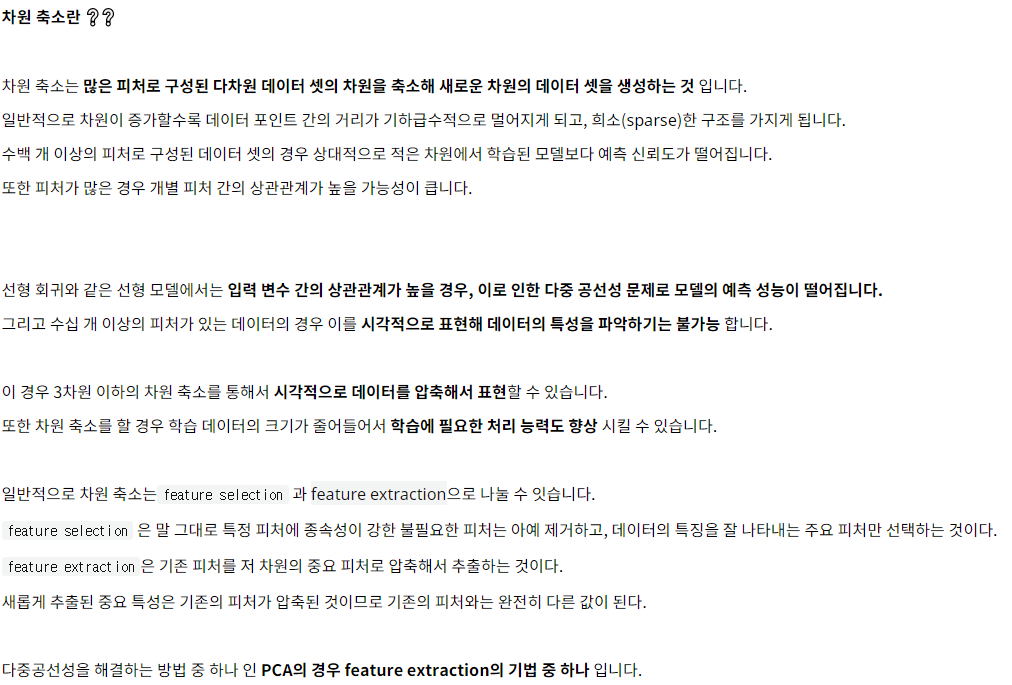](https://dacon.io/competitions/open/235698/talkboard/404068?page=1&dtype=recent)

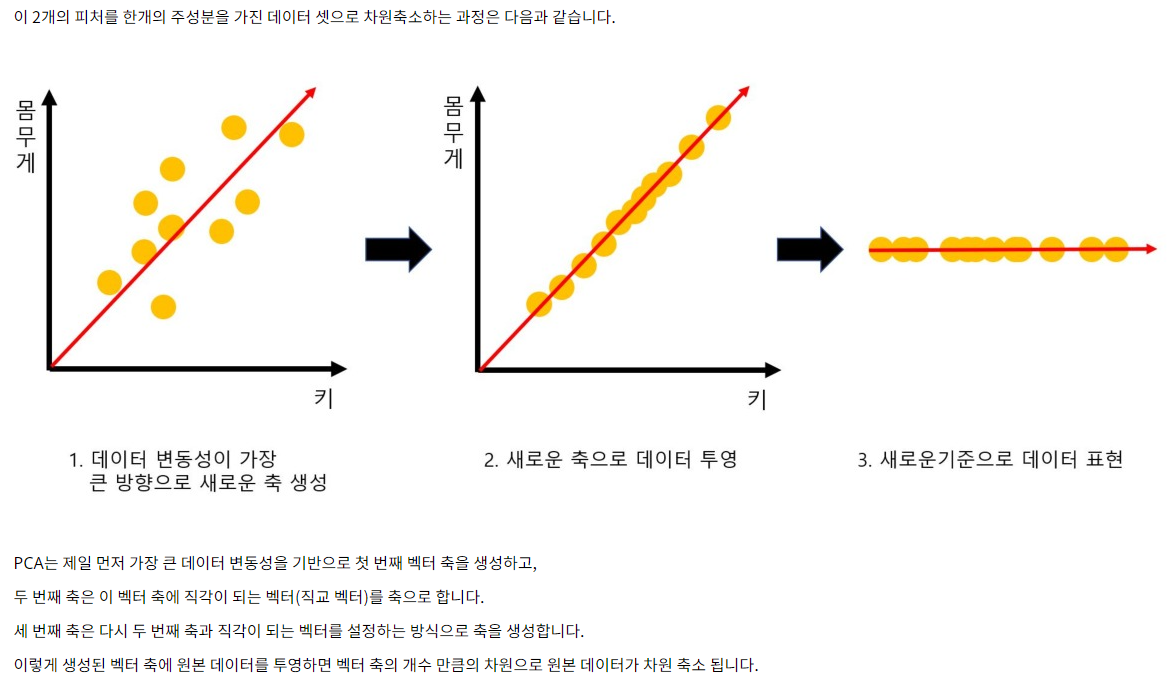

In [58]:
# 라이브러리 불러오기
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

# 정규화 라이브러리 호출
from sklearn.preprocessing import MinMaxScaler

# PCA 라이브러리 호출
from sklearn.decomposition import PCA

In [57]:
# 사이킷런 내장 데이터 셋 API 호출

iris = load_iris()

# DataFrame으로 변환
df = pd.DataFrame(iris.data)
df.columns =  ['sepal_length','sepal_width','petal_length','petal_width']
df['target']=iris.target
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


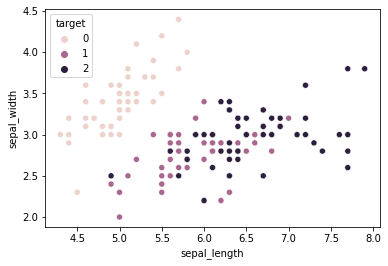

In [62]:
import seaborn as sns
sns.scatterplot(x='sepal_length', y='sepal_width', hue='target', data=df);

In [64]:
# Target 값을 제외한 모든 속성 값을 MinMaxScaler를 이용하여 변환
df_features = df[['sepal_length','sepal_width','petal_length','petal_width']]
df_scaler = MinMaxScaler().fit_transform(df_features)

# PCA를 이용하여 4차원 변수를 2차원으로 변환
pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 / 데이터 반환
df_pca = pca.fit_transform(df_scaler)
print(df_pca.shape)

(150, 2)


In [65]:
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ['PCA_1','PCA_2']
df_pca['target']=df.target
df_pca.head(3)

,PCA_1,PCA_2,target
0,-0.630703,0.107578,0
1,-0.622905,-0.104260,0
2,-0.669520,-0.051417,0


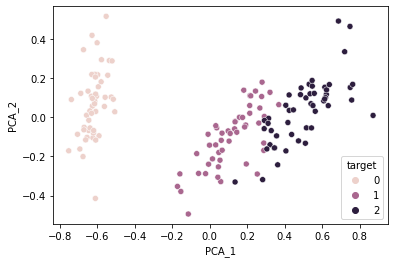

In [66]:
sns.scatterplot(x='PCA_1', y='PCA_2', hue='target', data=df_pca);

---

### 연속형 변수 변환

In [ ]:
def func(x):
    if x < 3:
        return 'lowest'
    elif x < 3.3:
        return 'low'
    elif x < 3.5:
        return 'normal'
    else :
        return'high' 

train['pH'] = train['pH'].apply(lambda x : func(x))

In [ ]:
# train 데이터의 alcohol 변수를 구간이 5개인 범주형 변수로 변환
 train['alcohol'] = pd.cut(train.alcohol, 5,labels=False)

In [70]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2) # 차원은 2로 설정

test_poly = poly_features.fit_transform(X_test) # fit_transform 메소드를 통해 데이터 변환
test_poly = pd.DataFrame(test_poly)
print(X_test.tail(3))
test_poly.tail()

     sat  weight  width
147    4   3.025   29.5
5      0   2.100   23.8
95     1   2.800   29.0


,0,1,2,3,4,5,6,7,8,9
30,1.0,0.0,2.000,23.1,0.0,0.0,0.0,4.000000,46.2000,533.61
31,1.0,4.0,1.950,24.7,16.0,7.8,98.8,3.802500,48.1650,610.09
32,1.0,4.0,3.025,29.5,16.0,12.1,118.0,9.150625,89.2375,870.25
33,1.0,0.0,2.100,23.8,0.0,0.0,0.0,4.410000,49.9800,566.44
34,1.0,1.0,2.800,29.0,1.0,2.8,29.0,7.840000,81.2000,841.00
